# DataViz notebook
    1) Visualization of top-5 most relevant variables of XGboost model with PCA
    2) Bonus: Characterization of False positives, false negatives
    
    Author: Nelson Fernandez Pinto
            @nfsrules

In [37]:
from sklearn import decomposition
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Open train partitions from Model training notebook
X_train = pd.read_csv('X_train_linear.csv', index_col=0)
y_train = pd.read_csv('y_train_linear.csv', index_col=0)

In [14]:
# Top 5 most relevant variables from XGboost time-series linear fit
top5_var_names = ['VAR_MRR_COEF',
                 'AGE_COEF',
                 'FIX_MRR_COEF',
                 'DELTA_LAST_INVOICE_LOAD_INTERCEPT',
                 'USERS_PER_FTE_COEF']


In [15]:
# Create PCA instance of dimension 2
pca = decomposition.PCA(n_components=2)

# Train PCA ins
pca.fit(X_train[top5_var_names]/X_train[top5_var_names].max())


PCA(n_components=2)

In [19]:
# Transform data to 2D space
X_pca = pca.transform(X_train[top5_var_names]/X_train[top5_var_names].max())

# Create a Pandas dataframe with results
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['PC1', 'PC2']
X_pca['Class'] = y_train.values
X_pca

,PC1,PC2,Class
0,0.128998,0.014134,0
1,-0.022558,-0.048184,1
2,0.007456,0.075387,0
3,0.086048,-0.014865,0
4,-0.035464,-0.032325,0
...,...,...,...
3565,-0.010594,-0.027493,0
3566,-0.043453,-0.021240,0
3567,-0.030143,-0.026983,0
3568,-0.016821,-0.061916,1


Text(0, 0.5, 'Explained variance (%)')

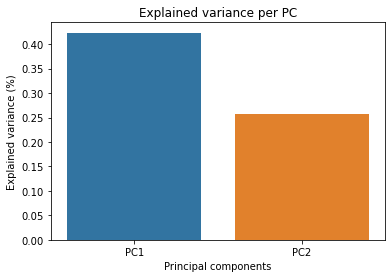

In [30]:
sns.barplot(y=pca.explained_variance_ratio_,
            x=['PC1', 'PC2'])
plt.title('Explained variance per PC')
plt.xlabel('Principal components')
plt.ylabel('Explained variance (%)')

In [62]:
print('Explained variance PC1: {}%, PC2: {}%, TOTAL: {}%'.format(pca.explained_variance_ratio_[0],
                                                              pca.explained_variance_ratio_[1],
                                                              np.sum(pca.explained_variance_ratio_)))


Explained variance PC1: 0.423388708984112%, PC2: 0.2562659807741728%, TOTAL: 0.6796546897582848%


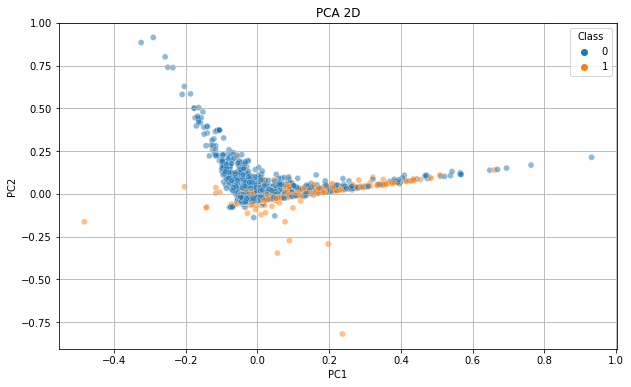

In [63]:
plt.rcParams['figure.figsize'] = [10, 6]
sns.scatterplot(x='PC1',
                y='PC2',
                data=X_pca,
                hue='Class',
                alpha=0.5)

plt.title('PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()

In [53]:
# Get the contribution of variables on each PC
df_pca = pd.DataFrame(pca.components_, 
                      columns=top5_var_names)

df_pca.index = ['PC1', 'PC2']
df_pca

,VAR_MRR_COEF,AGE_COEF,FIX_MRR_COEF,DELTA_LAST_INVOICE_LOAD_INTERCEPT,USERS_PER_FTE_COEF
PC1,-0.075978,0.041791,0.003064,0.961811,-0.259597
PC2,0.057703,0.028972,0.028200,0.262923,0.962241


### Comments:
    Variance in PC1 is mostly explained by DELTA_LAST_INVOICE_LOAD_INTERCEPT and USERS_PER_FTE_COEF
    PC1 > 0: Users that have a lot of time without loading money into the platform
    PC2 < 0: Userts that have less time without loading money into the platform
    
    Variance in PC2 is mostly explained by USERS_PER_FTE_COEF and DELTA_LAST_INVOICE_LOAD_INTERCEPT
    PC > 0: Users that increase their FTE per user over time
    PC = 0: Users that keep stable their FTE per user over time
    PC < 0: Users that reduce their FTE pre user over time
    

### Characterizing classes with PCA

    Class 0: Users that stay in the platform increase their FTE per user over time
             Some small fluctuations on the FTE per user around zero are allowed
    
    
    Class 1: Users that reduce their FTE per user over time or does not grow
             Users that loaded money into the platform long time ago